S. Stefano Rotondo al Celio
===============

In [2]:
from larlib import *
r0 = 24.; #cubiti; raggio interno del muro interno
r2 = 48.; #cubiti; raggio esterno del muro medio
r3 = 72.; #cubiti; raggio esterno del muro esterno
r4 = 88.; #cubiti; raggio esterno scale esterne
wsteps = 10.;  #cubiti; profondita' scale esterne
nsteps = 10.;  #numero alzate/pedate scale esterne
wstep = wsteps/nsteps; #cubiti; larghezza pedata
hstep = 1./3; #cubiti; altezza alzata
hw4 = 29.; #cubiti; altezza all'imposta del muro esterno
hbasament = hstep*nsteps;
#-------------------------------------------------------------%
#---Mappa cilindrica------------------------------------------%
##-------------------------------------------------------------%
##DEF cylMap = MAP:[S2 * sin ~ S1, S2 * cos ~ S1, S3];
cylMap = MAP([lambda p: (p[1]) * sin(p[0]), lambda p: (p[1]) * cos(p[0]), lambda p: (p[2])])

#-------------------------------------------------------------%
#---Scala esterna---------------------------------------------%
#-------------------------------------------------------------%
def vdom(h):
    return PROD([COMP([EMBED(1),INTERVALS(PI*3/24)])(3),QUOTE([h])])
def hdom(w):
    return COMP([S(2)(-1), EMBED(1)])(PROD([INTERVALS(PI*3/24)(3), QUOTE([w])]))
def steps(w, h):
    def steps1(n):
        return COMP([STRUCT, CAT, N(n)])([vdom(h), T(3)(h), hdom(w), T(2)(-w)])
    return steps1
hbasament = hstep * nsteps
stair = RIGHT([(steps(wstep, hstep)(nsteps)),COMP([S(2)(-1), SKEL_2, CUBOID])([PI/24, wsteps, hbasament])])
ramp = cylMap(T(2)(r4)(stair))
stairs = STRUCT(NN(12)([ramp, R([1, 2])(PI / 6)]))
#-------------------------------------------------------------%
#---Basamento-------------------------------------------------%
#-------------------------------------------------------------%
basisSector = COMP([cylMap, EMBED(1)])(PROD([INTERVALS(2 * PI / 12)(4), INTERVALS(r4 - (wstep * (nsteps - 1)))(1)]))

#basis = COMP([STRUCT, NN(12)])([basisSector, R([1, 2])(2 * PI / 12)])
basis = STRUCT(NN(12)([R([1,2])(2*PI/12),basisSector]))
basement = COMP([R([1, 2])(PI / -48), STRUCT])([stairs, T(3)(hstep * nsteps), basis])
#VIEW(basement)

Evaluating fenvs.py..
...fenvs.py imported in 0.005909 seconds


base di S. Stefano
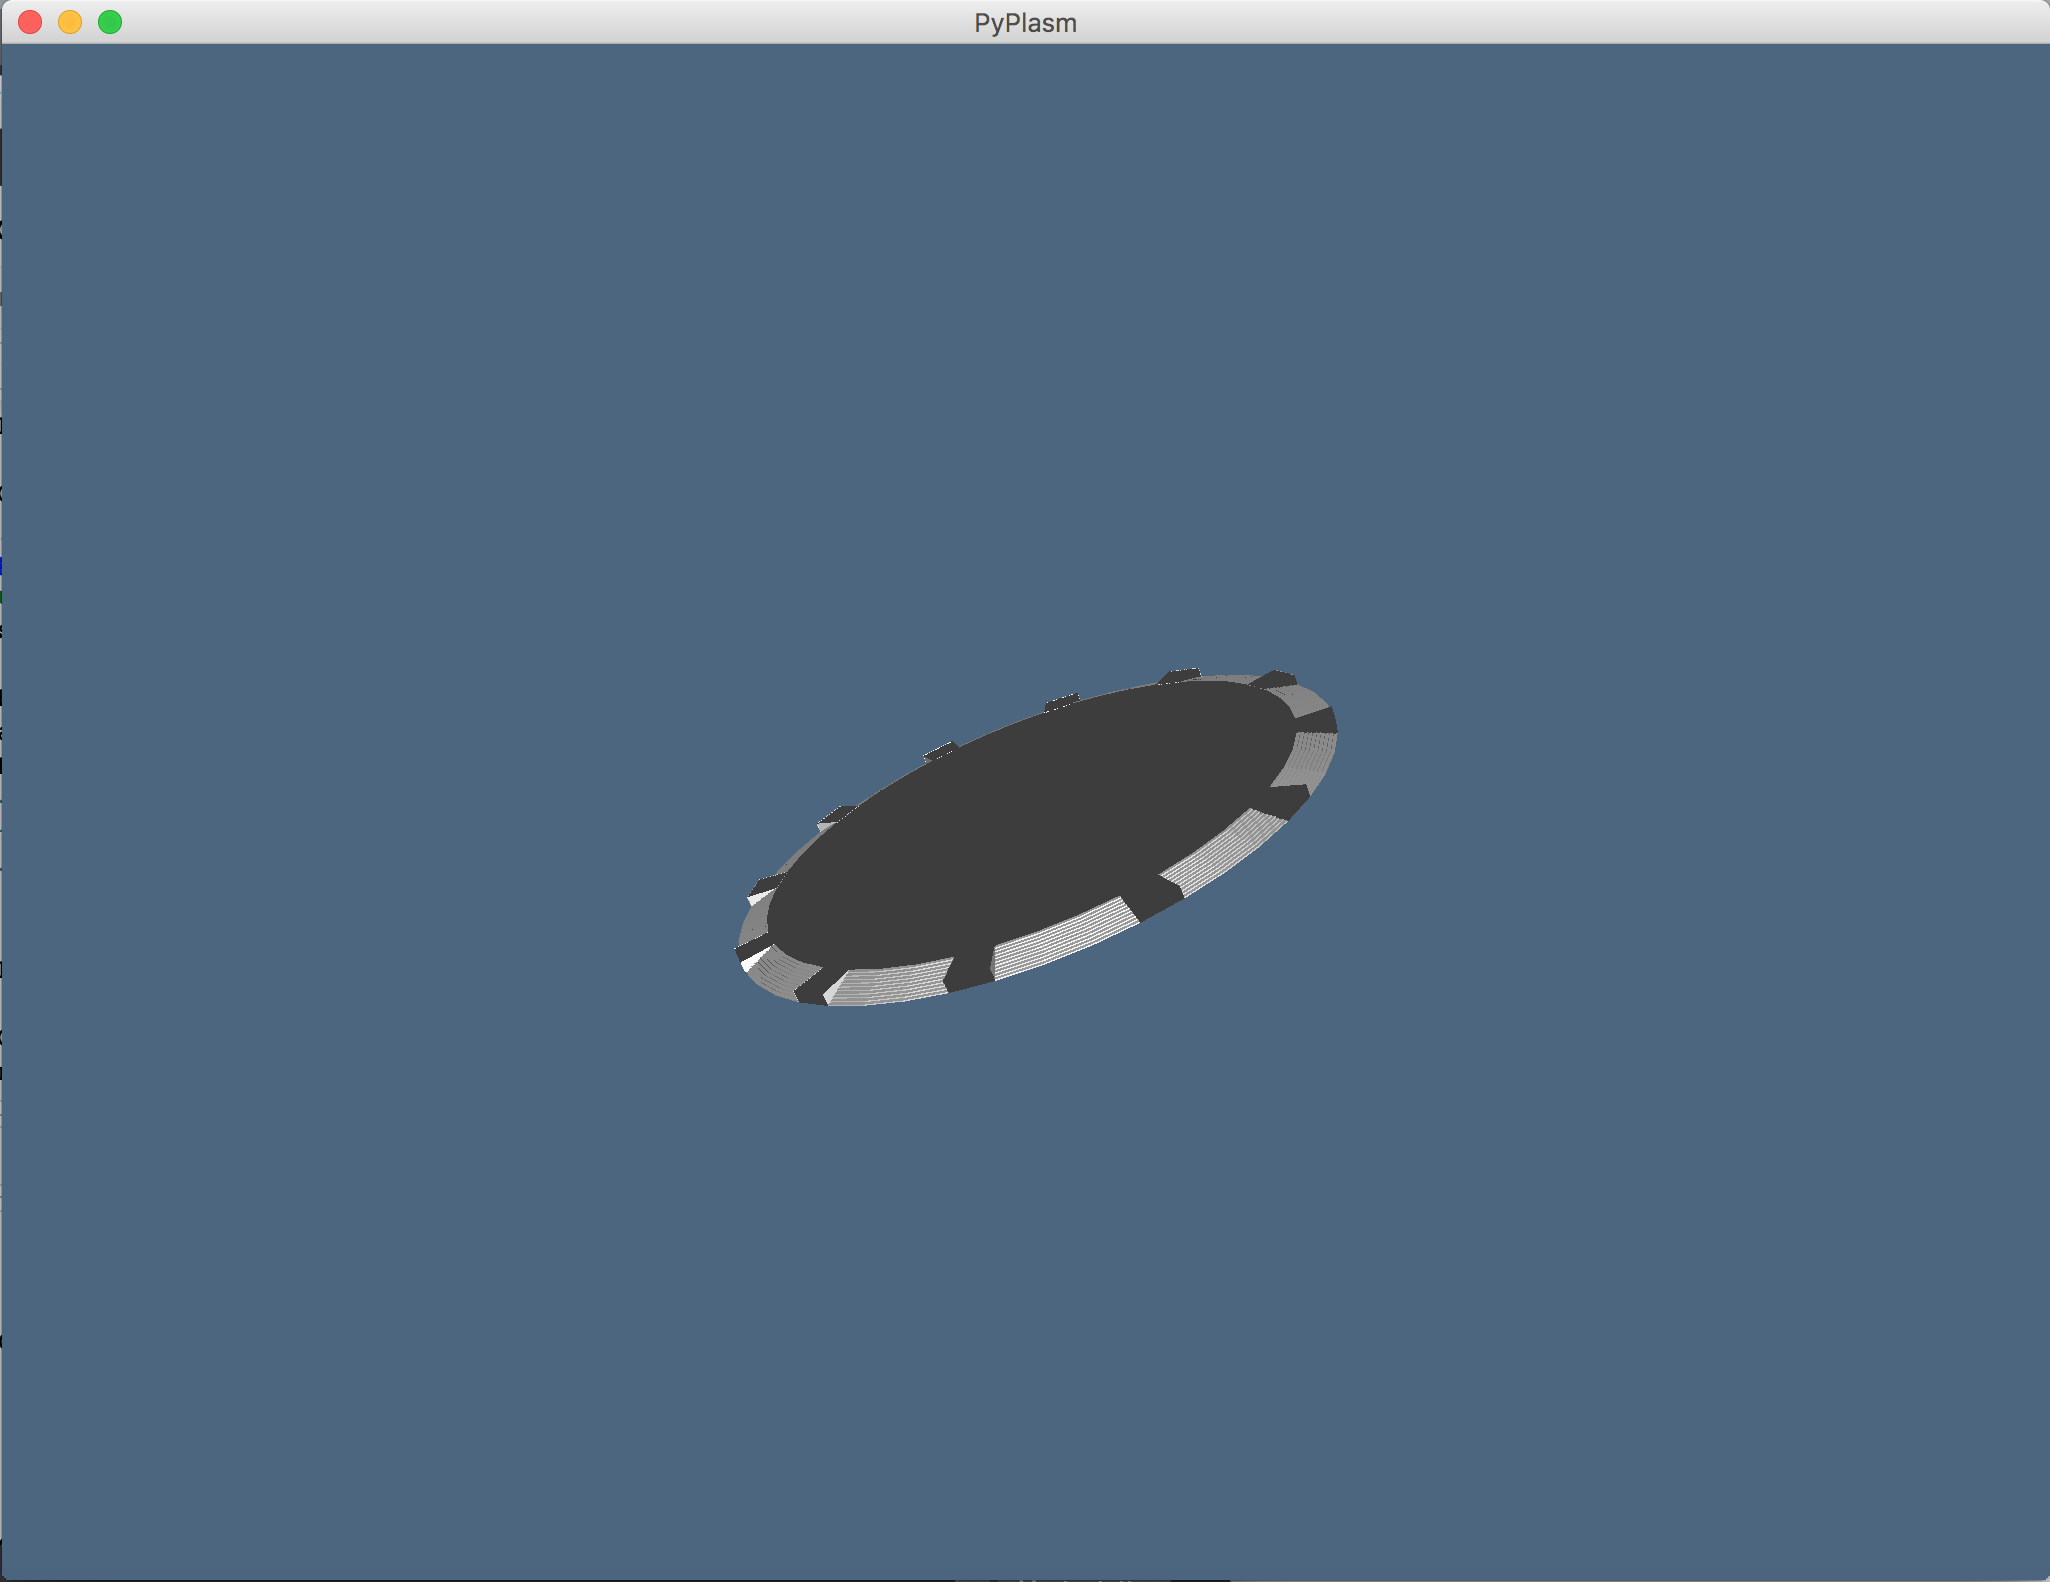Immagine della 

In [3]:
#-------------------------------------------------------------#
#---Muro esterno----------------------------------------------#
#-------------------------------------------------------------#
point=[[0,0],[7,0],[7,5],[0,8],[7,3],[9,4],[10.5,1.5],[10.5,0],[11,1.5],[11,3]]
cells=[[1,2,3,4],[2,8,7,6,5],[6,7,9,10]]
pols=[]
ExtWall2Da =MKPOL([point,cells,pols])
Dbpoint=[[0.5, 0], [4, 0], [5, 0], [6, 0], [6, 3], [5.5, 3.5], [5, 3], [4.5, 3.5], [4, 3], [2, 4], [0, 3], [0, 1.5], [0.5, 1.5]]
Dbcells=[[10, 11, 12, 13], [1, 2, 9, 10, 13], [2, 3, 7, 8, 9], [3, 4, 5, 6, 7]]
Dbpols=[]
ExtWall2Db =MKPOL([Dbpoint,Dbcells,Dbpols])

ExtWall2D = STRUCT([ExtWall2Da, T(1)(11), ExtWall2Db])
sizxExtWall = SIZE(1)(ExtWall2D)
ExtWall = R([2, 3])(PI/2)(PROD([ExtWall2D, QUOTE([1.5])]))
CurvedExtWall = COMP([cylMap, T(2)(r3), S([1, 3])([PI/(4*sizxExtWall), hw4/8])])(ExtWall)
DoubleExtWall = STRUCT([CurvedExtWall, S(1)(-1), CurvedExtWall])
FullExtWall = COMP([STRUCT, NN(4)])([DoubleExtWall, R([1, 2])(PI/2)])

In [3]:
fase1=STRUCT([basement, T(3)(hbasament), FullExtWall])
VIEW(fase1)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x1819e4bdb0> >

Prima immagine della chiesa
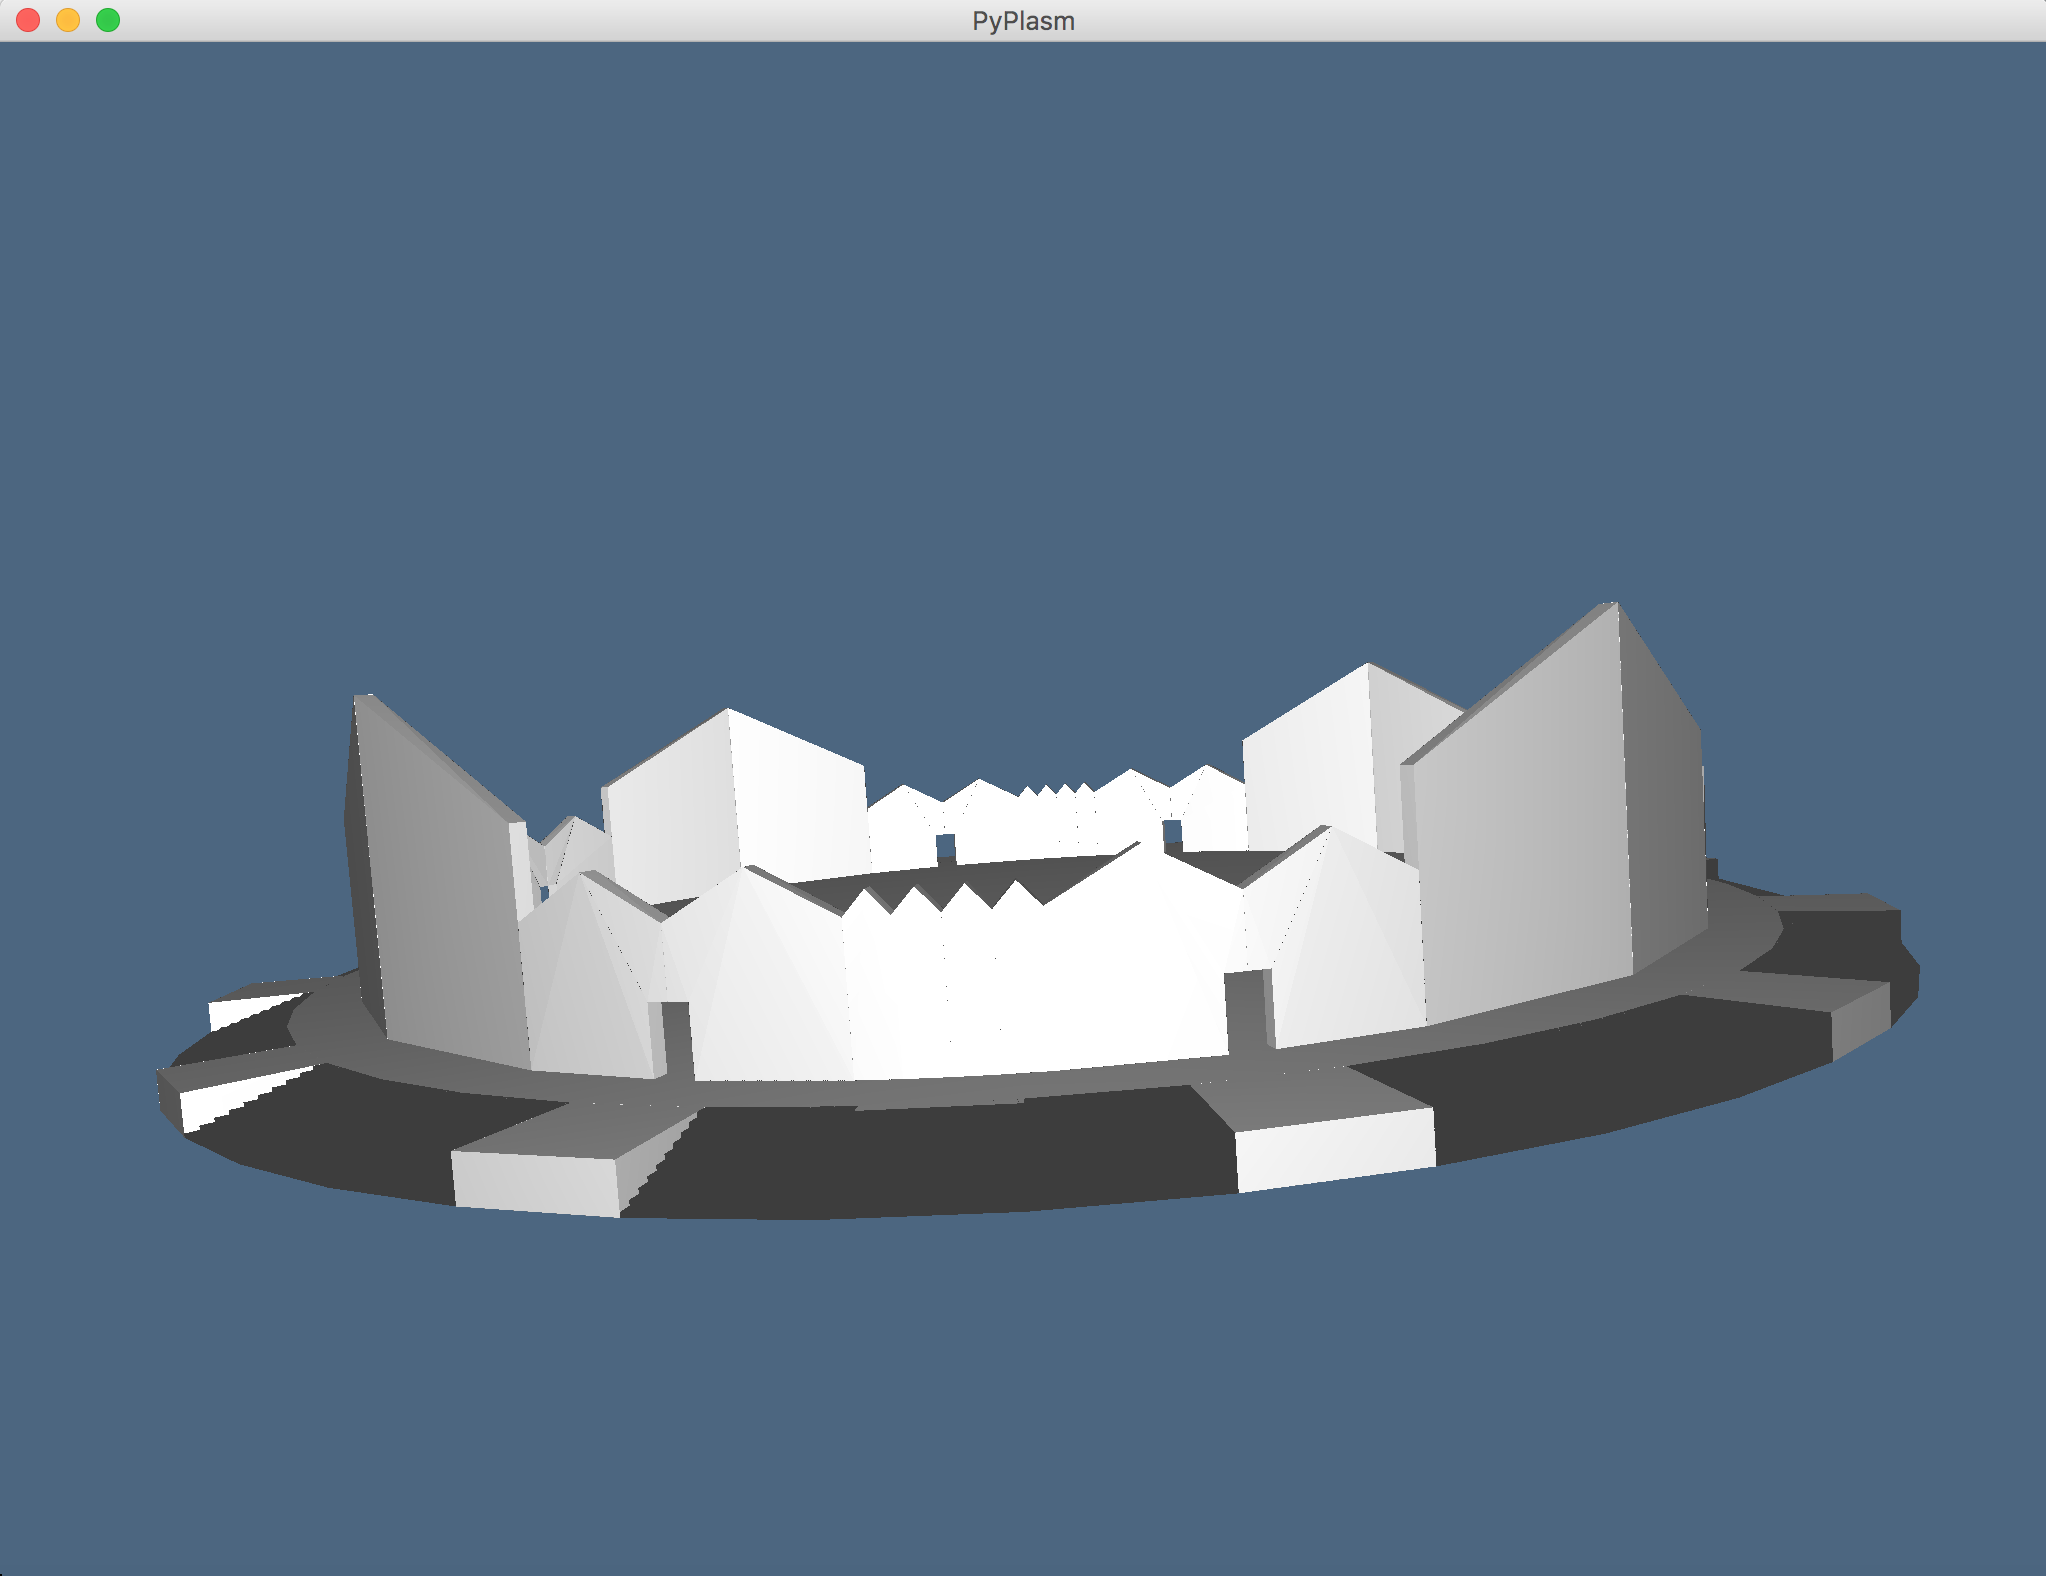

In [4]:

hCol = 12

def Column(w,h):
    basis = CUBOID([w, w, 2*w/3])
    trunk = CYLINDER([w/2*.85, h-w])(8)
    capitel = CUBOID([w, w, w/3])
    return TOP([TOP([basis, trunk]), capitel])


arcAngle = 2*PI/50.4
wallAngle = -3.2*arcAngle/4
RotCross = 3.2*arcAngle/4 + 2.5*arcAngle

MyColumn = T(2)(r2-.75)(Column(1.5, hCol))

The4cols = COMP([R([1, 2])(arcAngle*.4/3.2), MKPOL, UKPOL, STRUCT, NN(4)])([R([1, 2])(-arcAngle), MyColumn])

The5Cols = COMP([R([1, 2])(arcAngle*.4/3.2), MKPOL, UKPOL, STRUCT, NN(5)])([R([1,2])(-arcAngle), MyColumn])

TheBotWal = COMP([cylMap, MKPOL, UKPOL, T(2)(r2-.75), CUBOID])([3.2*arcAngle/4, 1.5, hCol])

TheSecCols = STRUCT([R([1, 2])(RotCross), TheBotWal, R([1, 2])(wallAngle), The4cols, R([1,2])(-5*arcAngle), TheBotWal, R([1,2])(wallAngle), The5Cols])

TheMedColumns = COMP([STRUCT, NN(4)])([TheSecCols, R([1, 2])(PI/-2)])
                    

In [6]:
#-----ARCHI SU COLONNE-----#
def bottomArc(d):
    return BEZIER(S1)([[0, 0],[0, 2*d/3],[d, 2*d/3],[d, 0]])

def topArc(d):
    return BEZIER(S1)([[0, 2*d/3],[d, 2*d/3]])

def arc2D(d):
    return BEZIER(S2)([bottomArc(d), topArc(d)])

def arc3D(d,w):
    return COMP([T(2)(w), R([2,3])(PI/2)])(PROD([MAP(arc2D(d))(PROD([INTERVALS(1)(8), INTERVALS(1)(1)])),QUOTE([w])]))

def Interarc(d1,d2,w):
    return CUBOID([d1, w, 2*d2/3])

def Xarc(d1,d2,w):
    return RIGHT([RIGHT([Interarc(d1,d2,w), arc3D(d2,w)]), Interarc(d1,d2,w)])

TheArc = Xarc(0.4,3.2,1.5)
SizeArc = SIZE(1)(TheArc)

def CurvedArc():
    sx = (1/SizeArc)*arcAngle
    sz = sx * (r2 - 2)
    return COMP([cylMap, T(2)(r2 - 0.75), S([1,3])([sx,sz])])(TheArc)

HeigthArc = SIZE(3)(CurvedArc())
The5arcs = COMP([STRUCT, NN(5)])([CurvedArc(), R([1,2])(-arcAngle)])
The6arcs = COMP([STRUCT, NN(6)])([CurvedArc(), R([1,2])(-arcAngle)])
TheMidWall = COMP([cylMap, T(2)(r2 - 0.75), CUBOID])([3.2*arcAngle/4, 1.5, HeigthArc])
TheSector = STRUCT([R([1,2])(RotCross), TheMidWall, R([1,2])(wallAngle),
                   The5arcs, R([1,2])(-5*arcAngle), TheMidWall,
                   R([1,2])(wallAngle), The6arcs])
TheArcs = COMP([STRUCT, NN(4)])([TheSector, R([1,2])(PI/-2)])
TheArcsCols = STRUCT([TheMedColumns, T(3)(hCol), TheArcs])

In [7]:
#----Muro intermedio Superiore----#
MedWall2Dverts = [[0,4],[8,4],[17,4],[17,5],[12.5,7.5],[8,5],[0,8]]
MedWall2Dcells = [[1,2,6,7],[2,3,4,5,6]]
MedWall2Dpol = []
MedWall2D = MKPOL([MedWall2Dverts, MedWall2Dcells, MedWall2Dpol])

sizxMedWall = SIZE(1)(MedWall2D)
MedWall = R([2,3])(PI/2)(PROD([MedWall2D, QUOTE([1.5])]))
CurvedMedWall = COMP([cylMap, T(2)(r2 + 0.75), S([1,3])([PI/(4*sizxMedWall), hw4/8.])])(MedWall)
DoubleMedWall = STRUCT([CurvedMedWall, S(1)(-1), CurvedMedWall])
FullMedWall = COMP([STRUCT, NN(4)])([DoubleMedWall, R([1,2])(PI/2)])
MedWallArcs = STRUCT([FullMedWall, TheArcsCols])

In [8]:
#----Muri Laterali sulla croce----#
CrossWall = COMP([T(1)(-1), R([1,2])(0.2*arcAngle), S(3)(hw4/8), CUBOID])([1.5, r3 - r2, 5])
SingleWall = COMP([R([1,2])(2.5*arcAngle),T(2)(r2)])(CrossWall)
DoubleWall = STRUCT([SingleWall, S(1)(-1), SingleWall])
CrossWalls = COMP([STRUCT, NN(4)])([DoubleWall, R([1,2])(PI/2)])
#----Tetto sulla Croce----#
HalfTetto = MKPOL([[[0,r2,8],[8,r2,5],[8,r3,5],[0,r3,8]],[[1,2,3,4]],[]])
CurvedHalfTetto = COMP([cylMap, S([1,3])([2.5*arcAngle/8, hw4/8])])(HalfTetto)
DoubleHalfTetto = STRUCT([CurvedHalfTetto, S(1)(-1), CurvedHalfTetto])
Tetto = COMP([STRUCT, NN(4)])([DoubleHalfTetto, R([1,2])(PI/-2)])
FullTetto = STRUCT([CrossWalls, Tetto])
#----Muro Con triplice copertura----#
def CourtWall(d1,d2,n1,n2):
    w = 0.7
    TripleHole = TOP([STRUCT([Column(w,2), T(1)(w+2), Column(w,2)]), Xarc(2,2,1)])
    h = SIZE(3)(TripleHole)
    op=ALIGN([[1,MAX,MIN],[2,MIN,MIN]])
    RightWall = PROD([COMP([QUOTE, N(n2)])(d2/n2), CUBOID([1,h])])
    LeftWall = PROD([COMP([QUOTE, N(n1)])(d1/n1), CUBOID([1,h])])
    return op([LeftWall,op([TripleHole,RightWall])])
#----Muro inferiore Cortile Interno----#
mycourtwall=CourtWall(12,12,9,9)
sizxCourtWall=SIZE(1)(mycourtwall)
mapping=COMP([cylMap, S([1,3])([(7.25*PI/24)*(1/sizxCourtWall), hw4/8])])
CurvedCourtWall = COMP([R([1,2])(-2.5*arcAngle), mapping, T(2)((r3+r2)/2)])(mycourtwall)
CrossCourtWall = COMP([STRUCT, NN(4)])([CurvedCourtWall, R([1,2])(PI/2)])

In [9]:
#-------------------------------------------------------------%
#---Coronamento Muro Cortile interno--------------------------%
#-------------------------------------------------------------%
Verts = [[0,3.333],[10,3.333],[10,4.333],[5,6.333],[0,4.333]]
Cells = [[1,2,3,4,5]]
Pol = []
TopCourtWall2D = MKPOL([Verts, Cells, Pol])

TopCourtWall = R([2,3])(PI/2)(PROD([TopCourtWall2D, QUOTE([1])]))
MyTopCourtWall = RIGHT([TopCourtWall, RIGHT([TopCourtWall, TopCourtWall])])

CurvedTopCourtWall = COMP([R([1,2])(-2.5*arcAngle), mapping, T(2)((r3+r2+2)/2)])(MyTopCourtWall)
FullTopCourtWall = COMP([STRUCT, NN(4)])([CurvedTopCourtWall, R([1,2])(PI/2)])
#----Tetto su Cortile interno----#
RotWall = 2.5*arcAngle

CourTettoVerts = [[0,(r3+r2+2)/2,3.333],[10,(r3+r2+2)/2,3.333],[10,r2,4.333],[0,r2,4.333],[0,(r3+r2+2)/2,3.433],[10,(r3+r2+2)/2,3.433],[10,r2,4.433],[0,r2,4.433]]
CourTettoCells = [[1,2,3,4,5,6,7,8]]
CourTettoPol = []
CourTetto = INTERSECTION([MKPOL([CourTettoVerts, CourTettoCells, CourTettoPol]),PROD([COMP([QUOTE,N(10)])(1),PROD([QUOTE([(r3+r2+2)/2]),QUOTE([5])])])])
MyCourTetto = RIGHT([CourTetto, RIGHT([CourTetto, CourTetto])])
CurvedCourTetto = COMP([R([1,2])(-RotWall), mapping])(MyCourTetto)
FullCourTetto = COMP([STRUCT, NN(4)])([CurvedCourTetto, R([1,2])(PI/2)])

In [10]:
#----Colonne Muro interno----#
def Radial22Obj(Obj):
    The4Obj = COMP([STRUCT, NN(4)])([Obj, R([1,2])(PI/11)])
    The2Obj = COMP([STRUCT, NN(2)])([Obj, R([1,2])(PI/11)])
    The20Obj = COMP([STRUCT, NN(5)])([The4Obj, R([1,2])(4*PI/11)])
    returnStruct = STRUCT([The20Obj, R([1,2])((20*PI)/11), The2Obj])
    return returnStruct

InternalCol = T(2)(r0 - 2)(Column(1.5, hCol))
The22Columns = Radial22Obj(InternalCol)

#----Travi Muro interno----#
Beam = PROD([PROD([QUOTE([-.5,1.5,2,1.5]), QUOTE([2.2])]), QUOTE([1.5])])
CurvedBeam = COMP([cylMap, T([2,3])([r0 - 2, hCol]), S(1)(PI/55)])(Beam)
The22Beam = STRUCT([Radial22Obj(CurvedBeam), The22Columns])
#----Muro interno Superiore----#
HwallProd1 = PROD([PROD([QUOTE([-.5,1.75,-1.5,1.75]), QUOTE([-.3,1.4])]), QUOTE([2.5*hCol])])
HwallProd2 = PROD([PROD([QUOTE([-2.25,1.5]), QUOTE([-.3,1.4])]), QUOTE([1.5*hCol, -.5*hCol, .5*hCol])])
Hwall = STRUCT([HwallProd1, HwallProd2])
CurvedHwall = COMP([cylMap, T([2,3])([r0 - 2, hCol]), S(1)(PI/55)])(Hwall)
The22Hwall = Radial22Obj(CurvedHwall)
#----Coronamento Muro Superiore----#
myArc = MAP([lambda p: sin(p[0]), lambda p: cos(p[0])])(QUOTE(N(5)(PI/10)))
Vertex = MK([0,0])
Sector = JOIN([myArc, Vertex])
Triangle = S(1)(-1)(SIMPLEX(2))
SectorTriangle2D = STRUCT([T(1)(0.05), Sector,  T(1)(2), Triangle])
DoubleSect = STRUCT([SectorTriangle2D, S(1)(-1)(SectorTriangle2D)])
Sect2D = S(1)(2/2.05)(DoubleSect)
Sect3D = R([2,3])(PI/2)(PROD([Sect2D, QUOTE([.8])]))
CurvedSect = COMP([cylMap, T(2)(r0), S([1,3])([2*PI/44,3])])(Sect3D)
Frieze = T(3)(3.5*hCol)(CurvedSect)
def Radial11Obj(Obj):
    The2Obj = COMP([STRUCT, NN(2)])([Obj, R([1,2])(2*PI/11)])
    The10Obj = COMP([STRUCT, NN(5)])([The2Obj, R([1,2])(4*PI/11)])
    returnStruct = STRUCT([The10Obj, R([1,2])((20*PI)/11), Obj])
    return returnStruct

The11Frieze = Radial11Obj(Frieze)
#----traliccio tetto intermedio----#
def Trellis(H,L):
    verts = [[0,0],[L/3,0],[2*L/3,0],[L,0],[2*L/3,H/3],[L/3,2*H/3],[0,H]]
    cells = [[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,1],[1,6],[6,2],[2,5],[5,3]]
    pol = []
    return COMP([R([2,3])(PI/2), EMBED(1), MKPOL])([verts, cells, pol])

def Radial(n):
    def Radial1(obj):
        return COMP([STRUCT,NN(n/3)])([COMP([STRUCT,NN(n/3)])([obj,R([1,2])(2*PI/n)]),R([1,2])(2*PI/3)])
    return Radial1

TrellisTop3D = COMP([T(2)(-.25), S(2)(.5), OFFSET([1,1,1])])(Trellis(hCol, r0 - 1))
TheTopTrellis = T(3)(3.5*hCol)(TrellisTop3D)
TopTrellis = Radial(12)(TheTopTrellis)


In [11]:
#---Traliccio Tetto intermedio---#
TrellisMed3D = COMP([T(2)(-.25), S(2)(.5), OFFSET([1,1,1])])(Trellis(hCol, r2 - r0))
TheMedTrellis = T(3)(hCol + 3)(TrellisMed3D)
MedTrellis = Radial(24)(T(1)(r0)(TheMedTrellis))
DoubleMedTrellis = STRUCT([MedTrellis, R([1,2])(PI/24), MedTrellis])

In [24]:
fase2=STRUCT([basement, T(3)(hbasament), FullExtWall, TheMedColumns])
VIEW(fase2)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2840> >

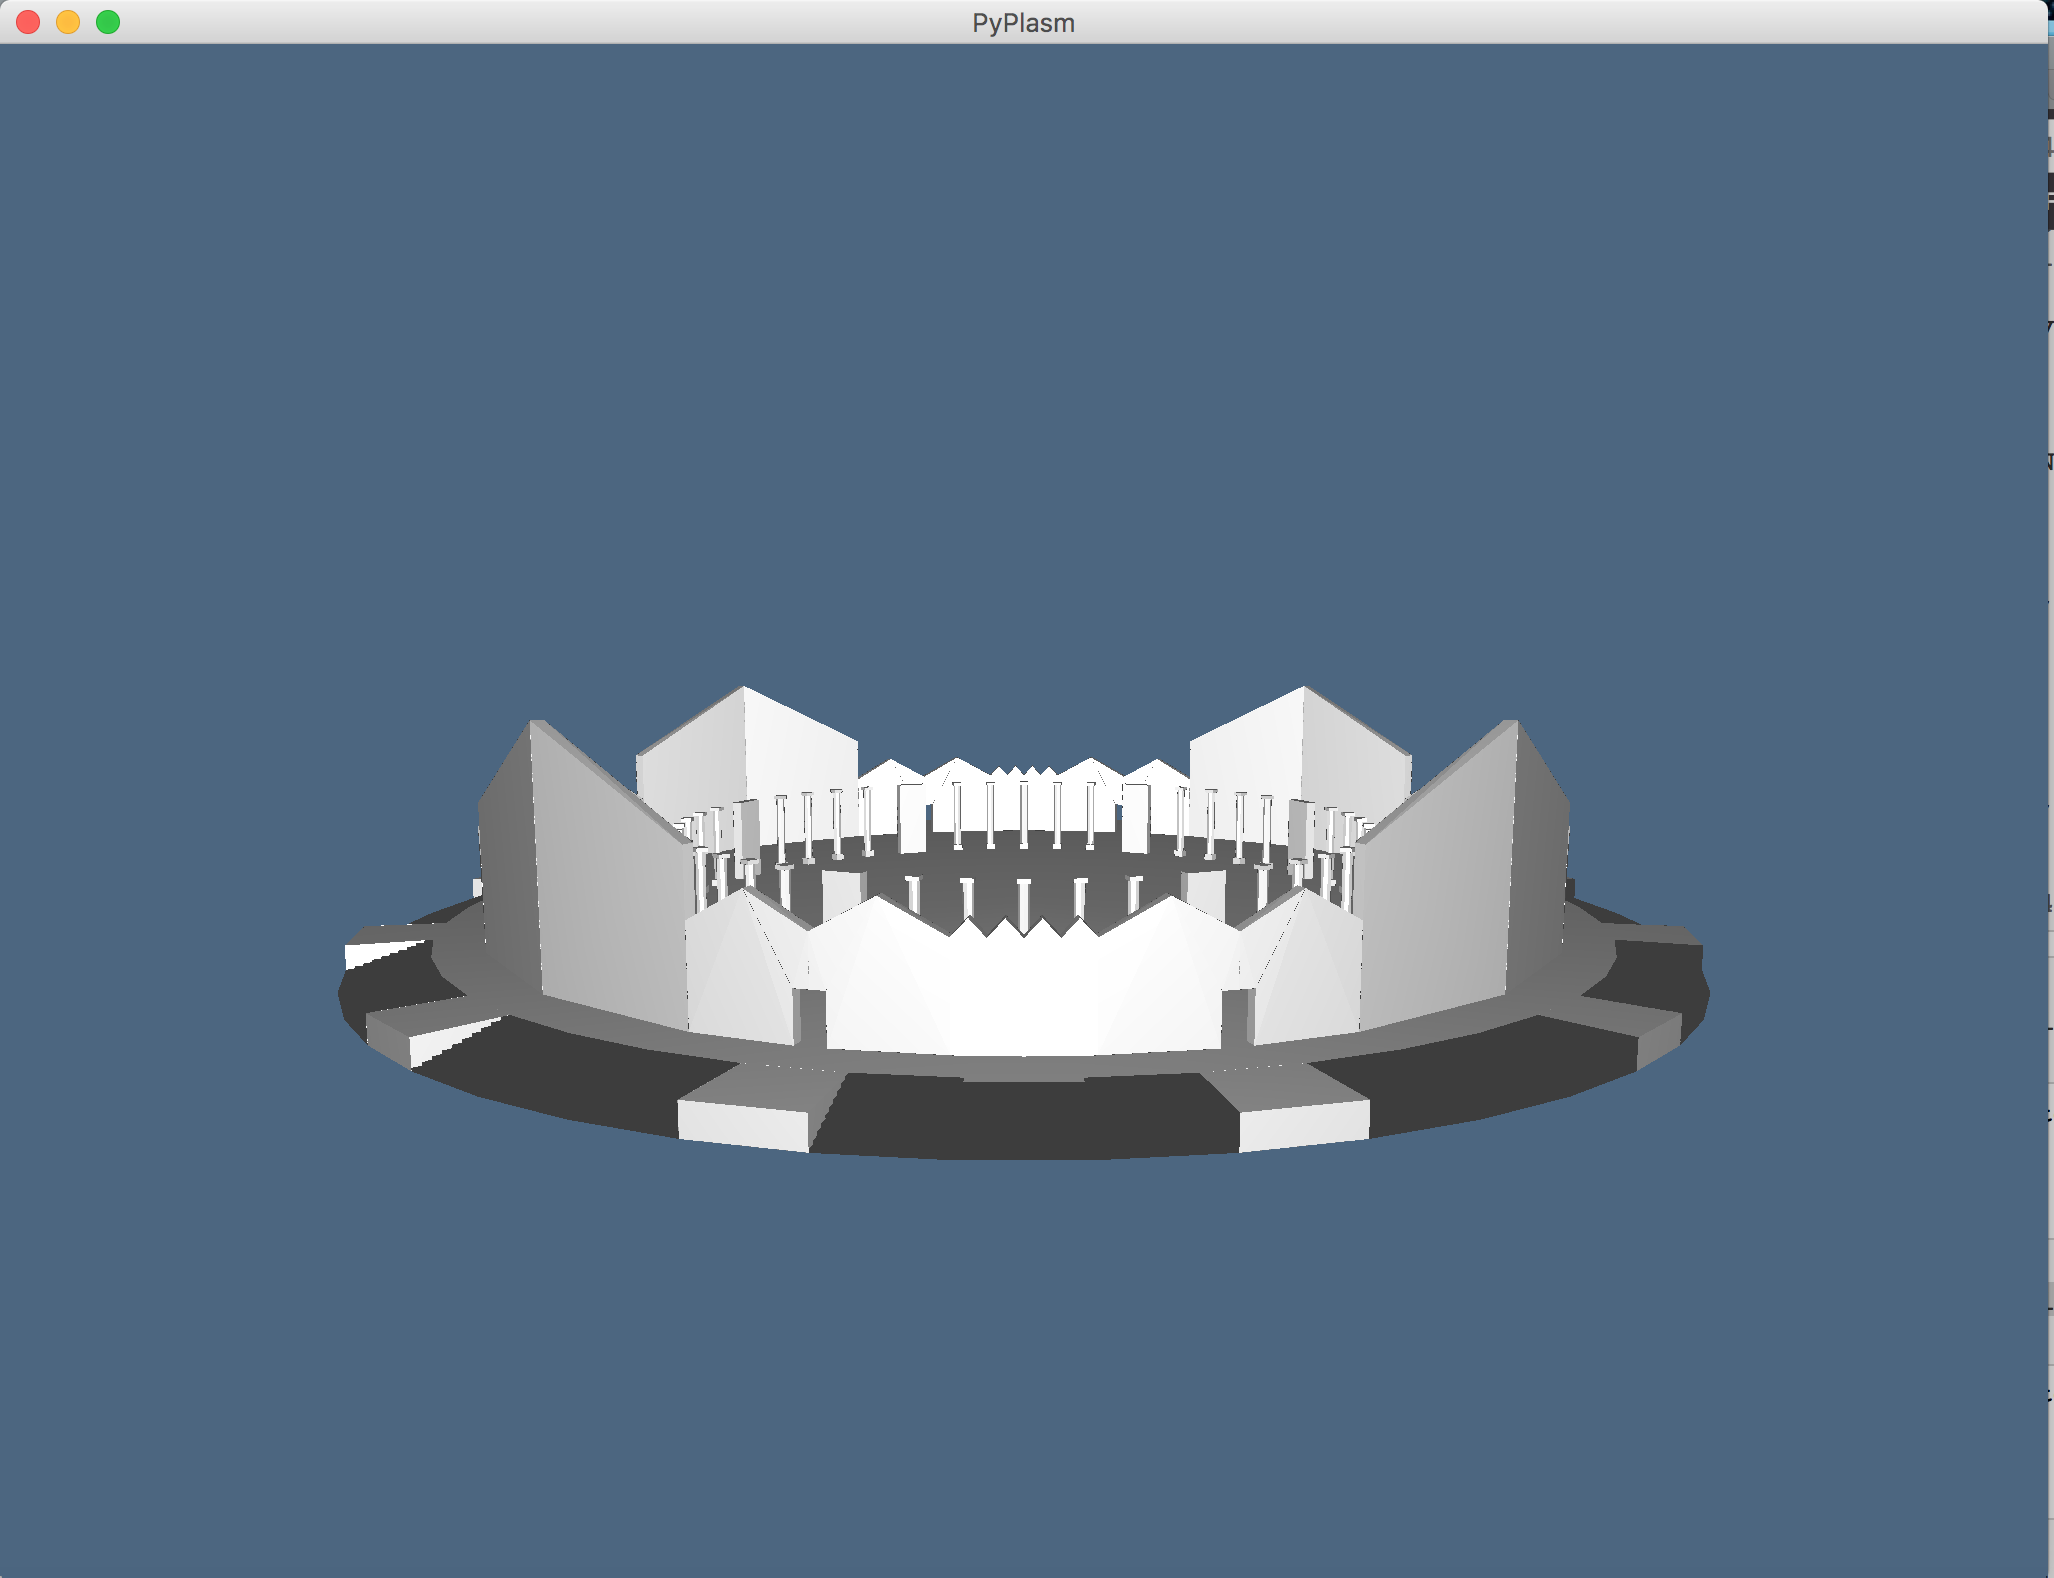

In [25]:
fase3 = STRUCT([basement, T(3)(hbasament), FullExtWall, MedWallArcs])
VIEW(fase3)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f28a0> >

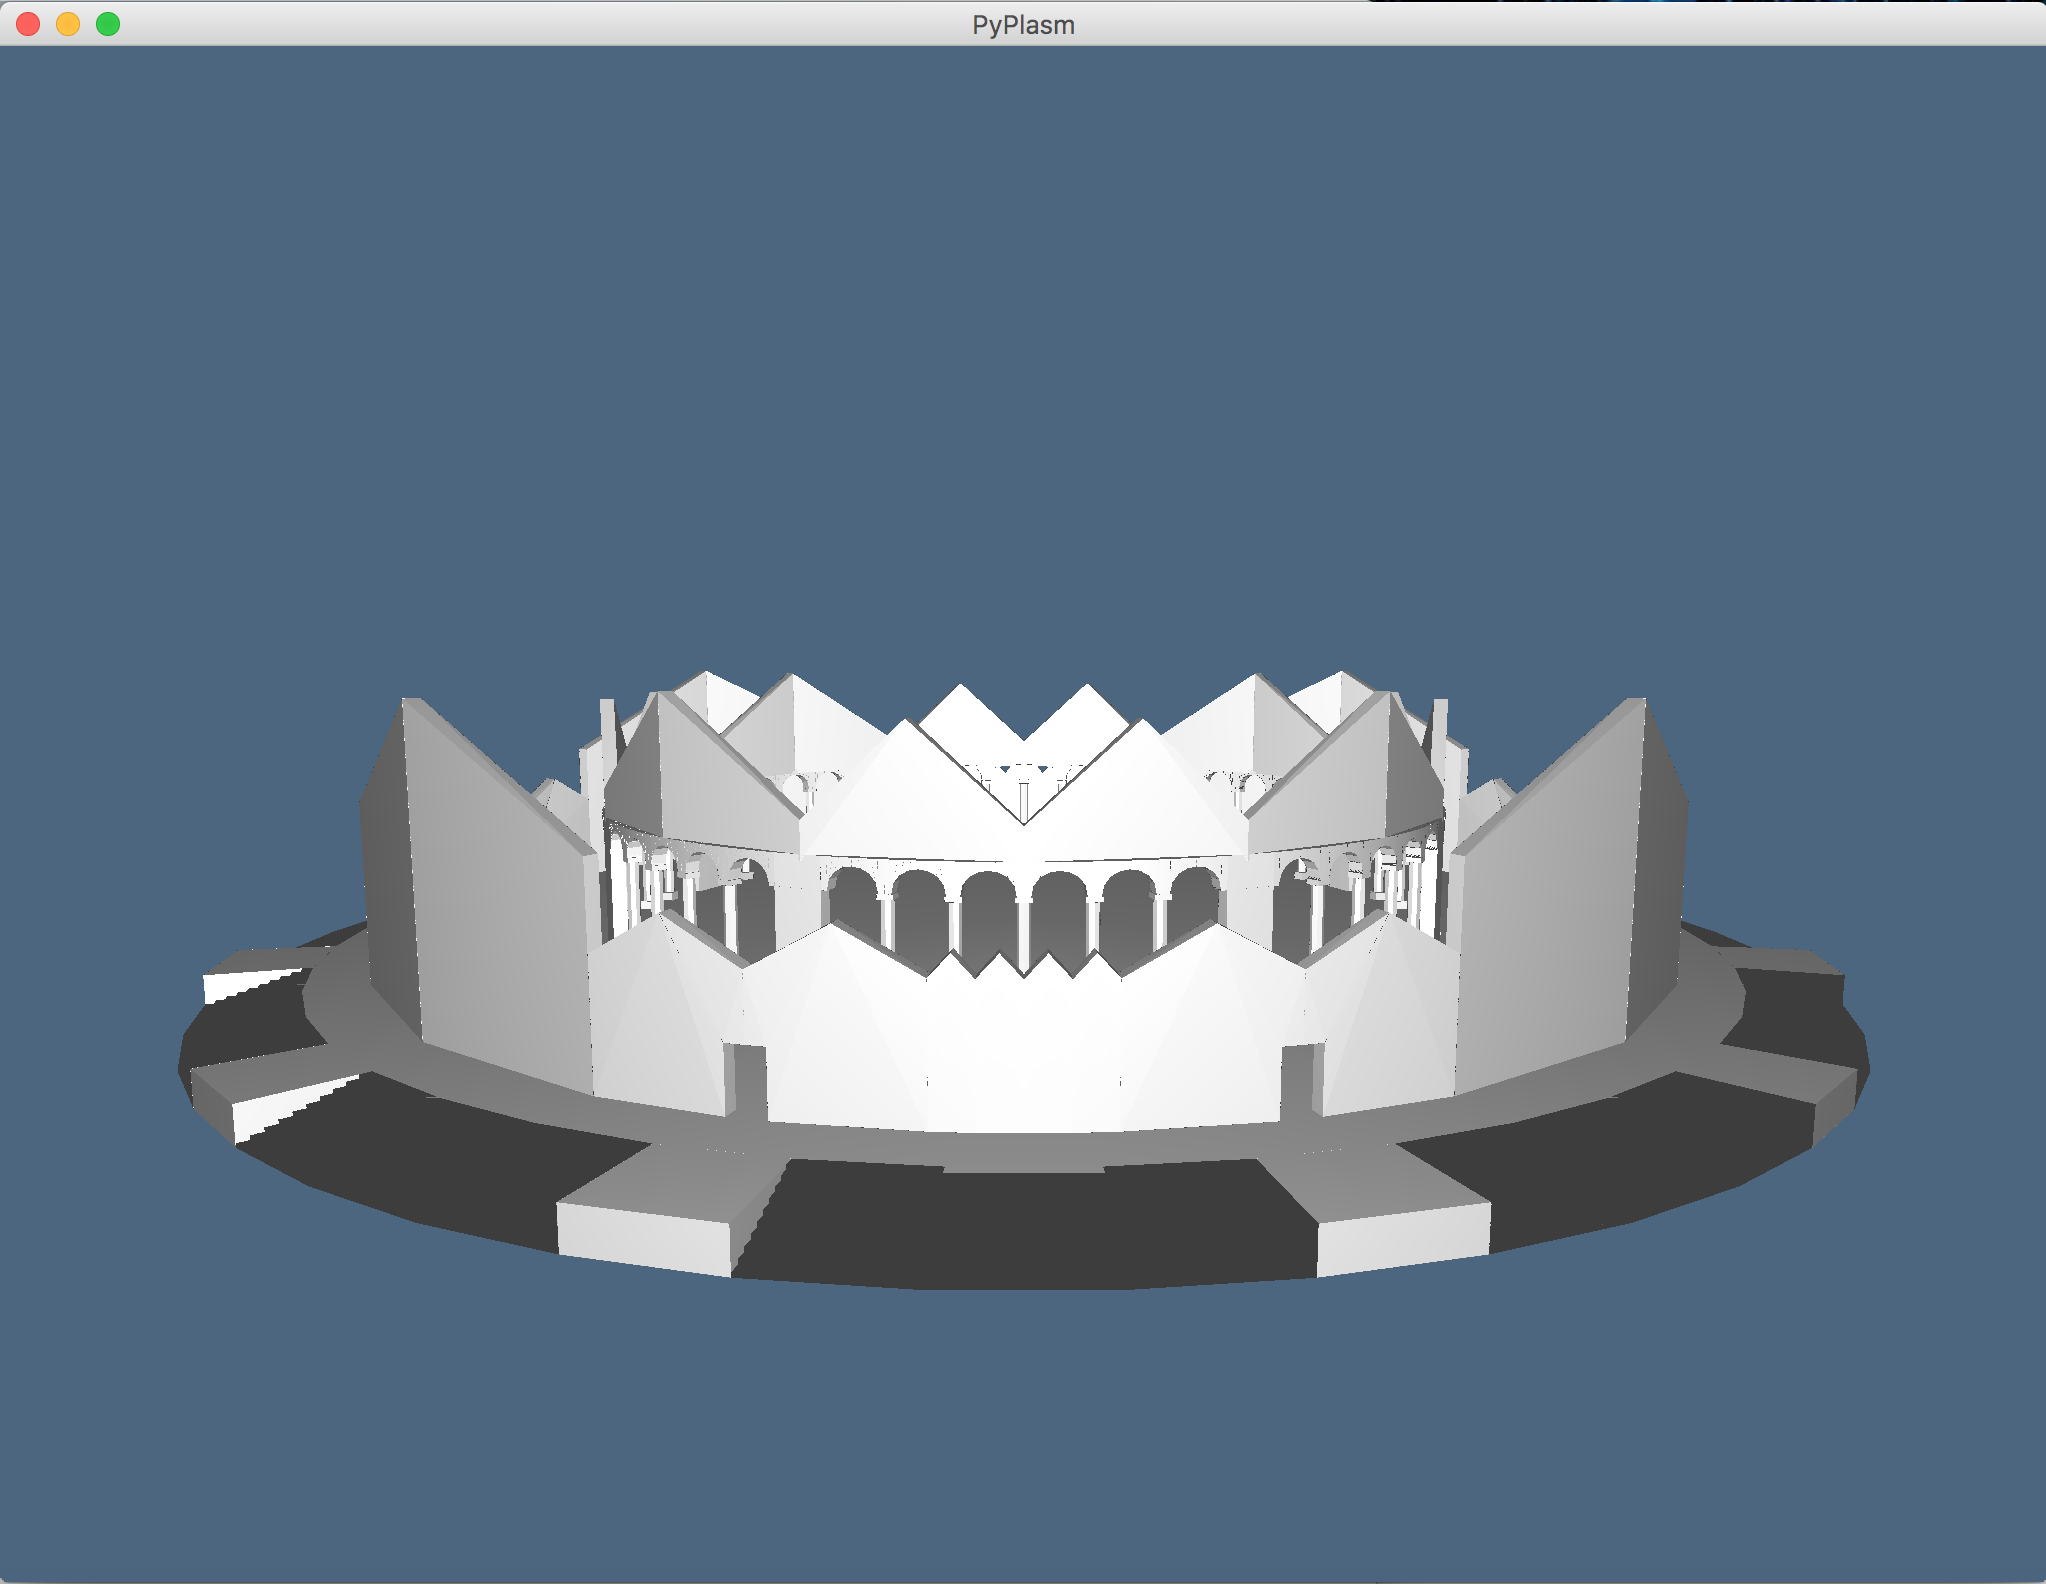

In [27]:
fase4 = STRUCT([basement, T(3)(hbasament), FullExtWall, MedWallArcs, FullTetto])
VIEW(fase4)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2960> >

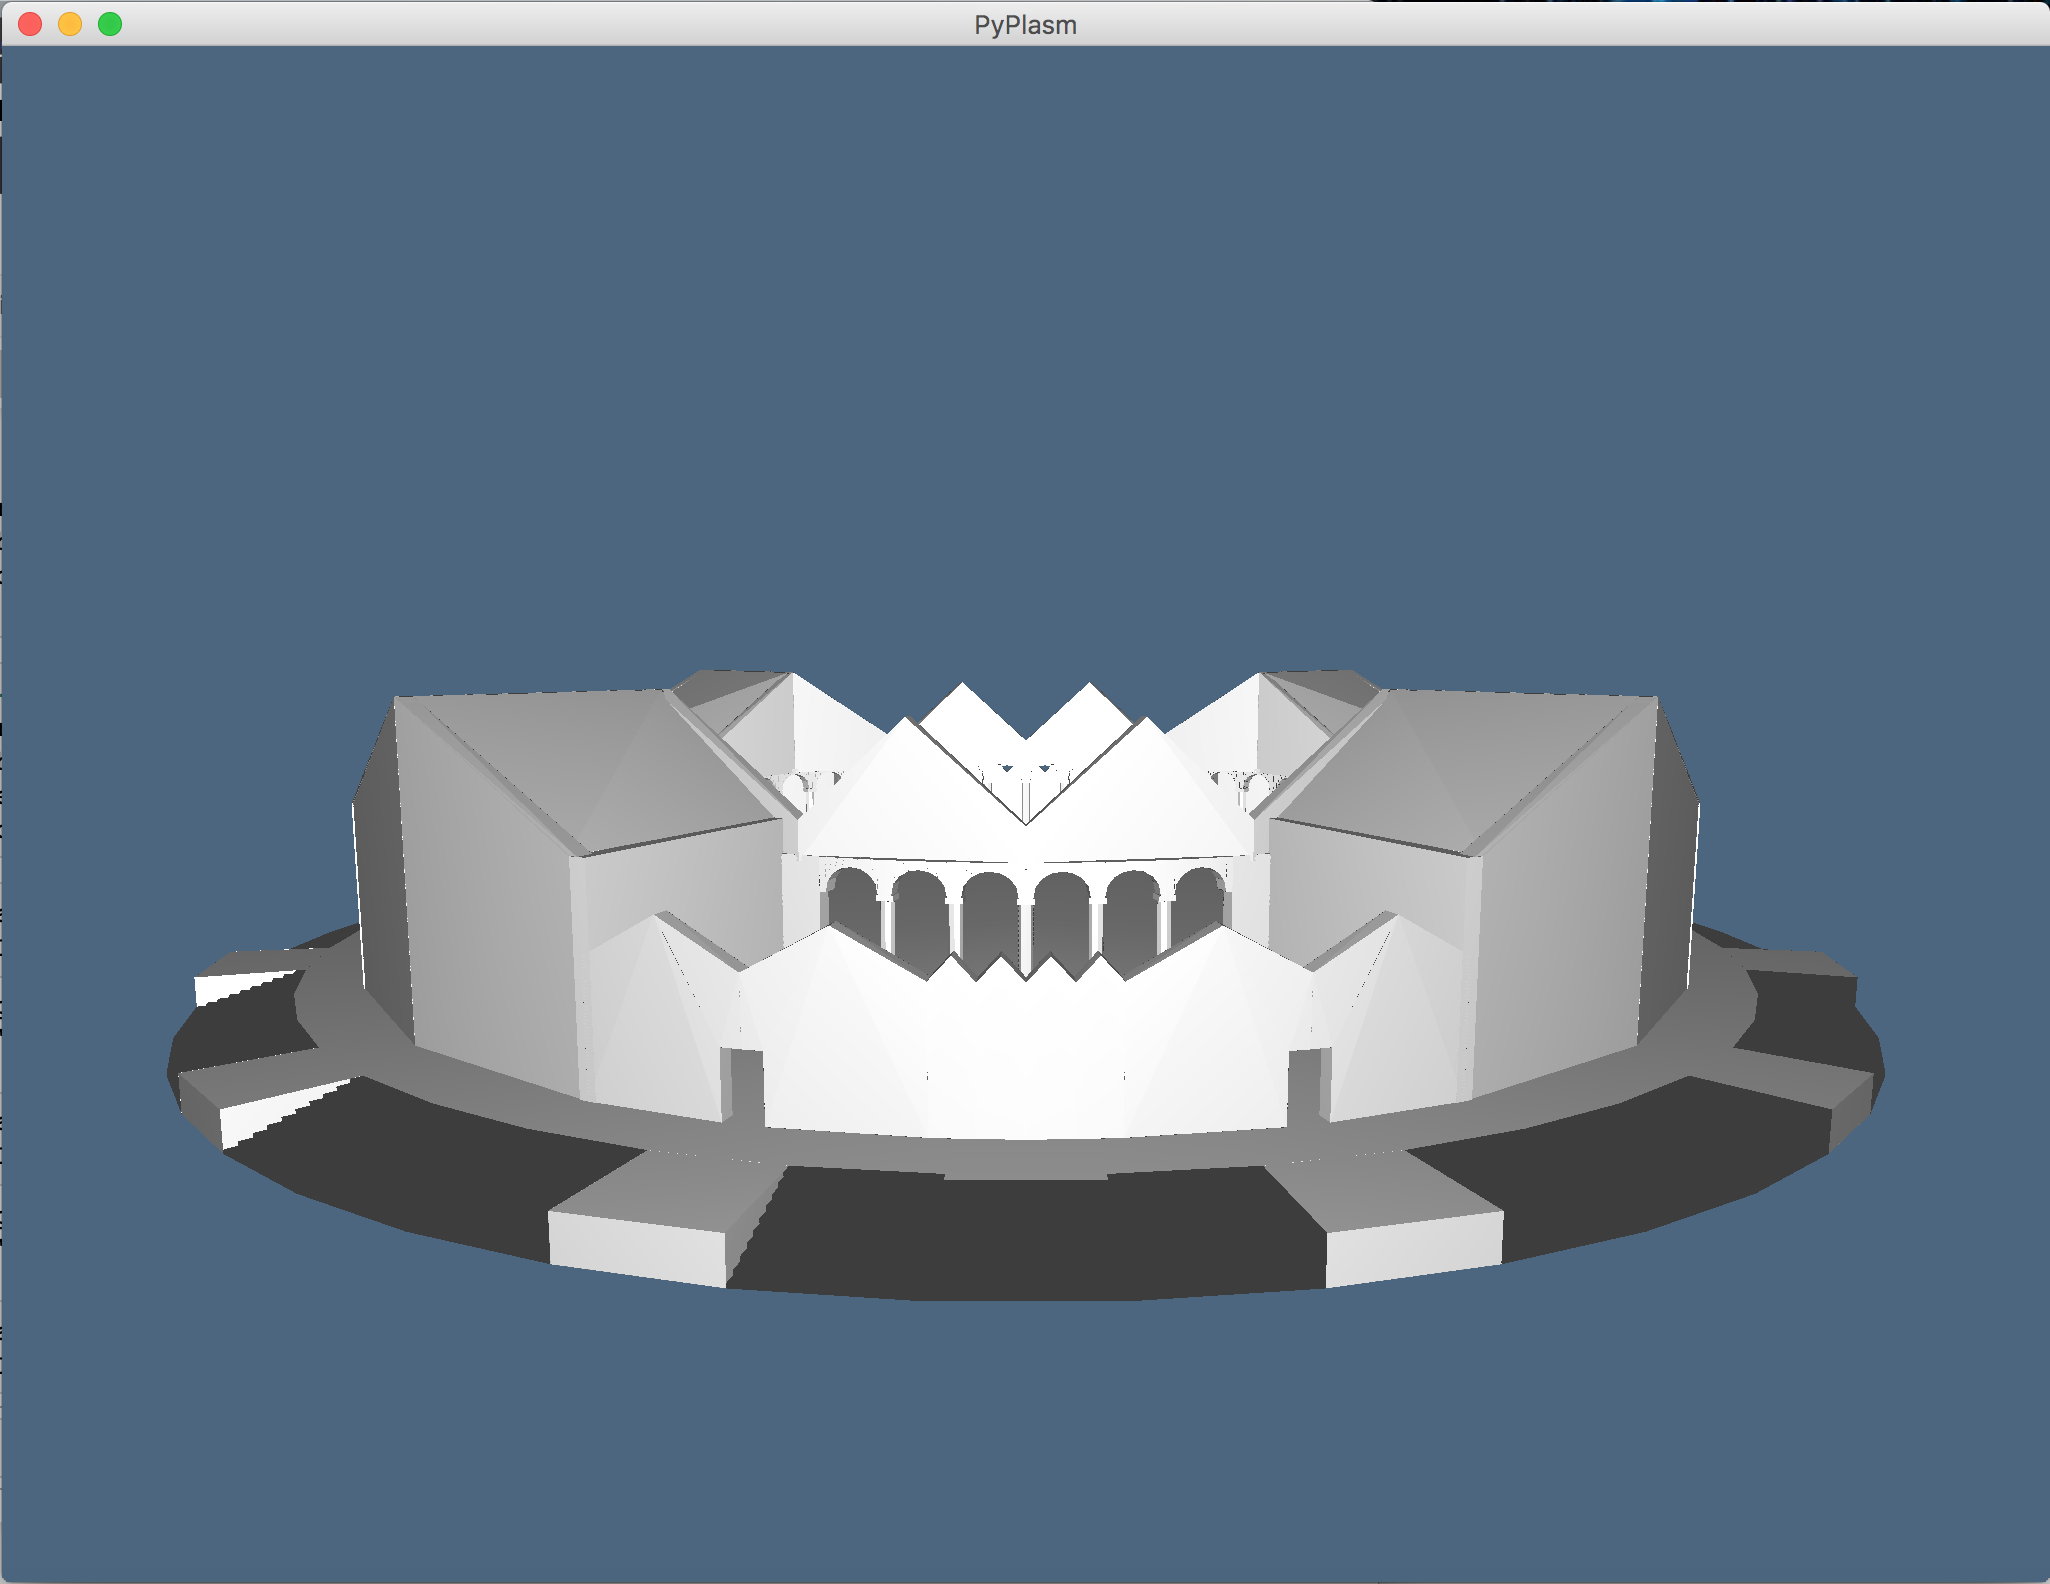

In [29]:
fase5 = STRUCT([basement, T(3)(hbasament), FullExtWall, MedWallArcs, FullTetto, FullCourTetto, FullTopCourtWall, CrossCourtWall])
VIEW(fase5)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2870> >

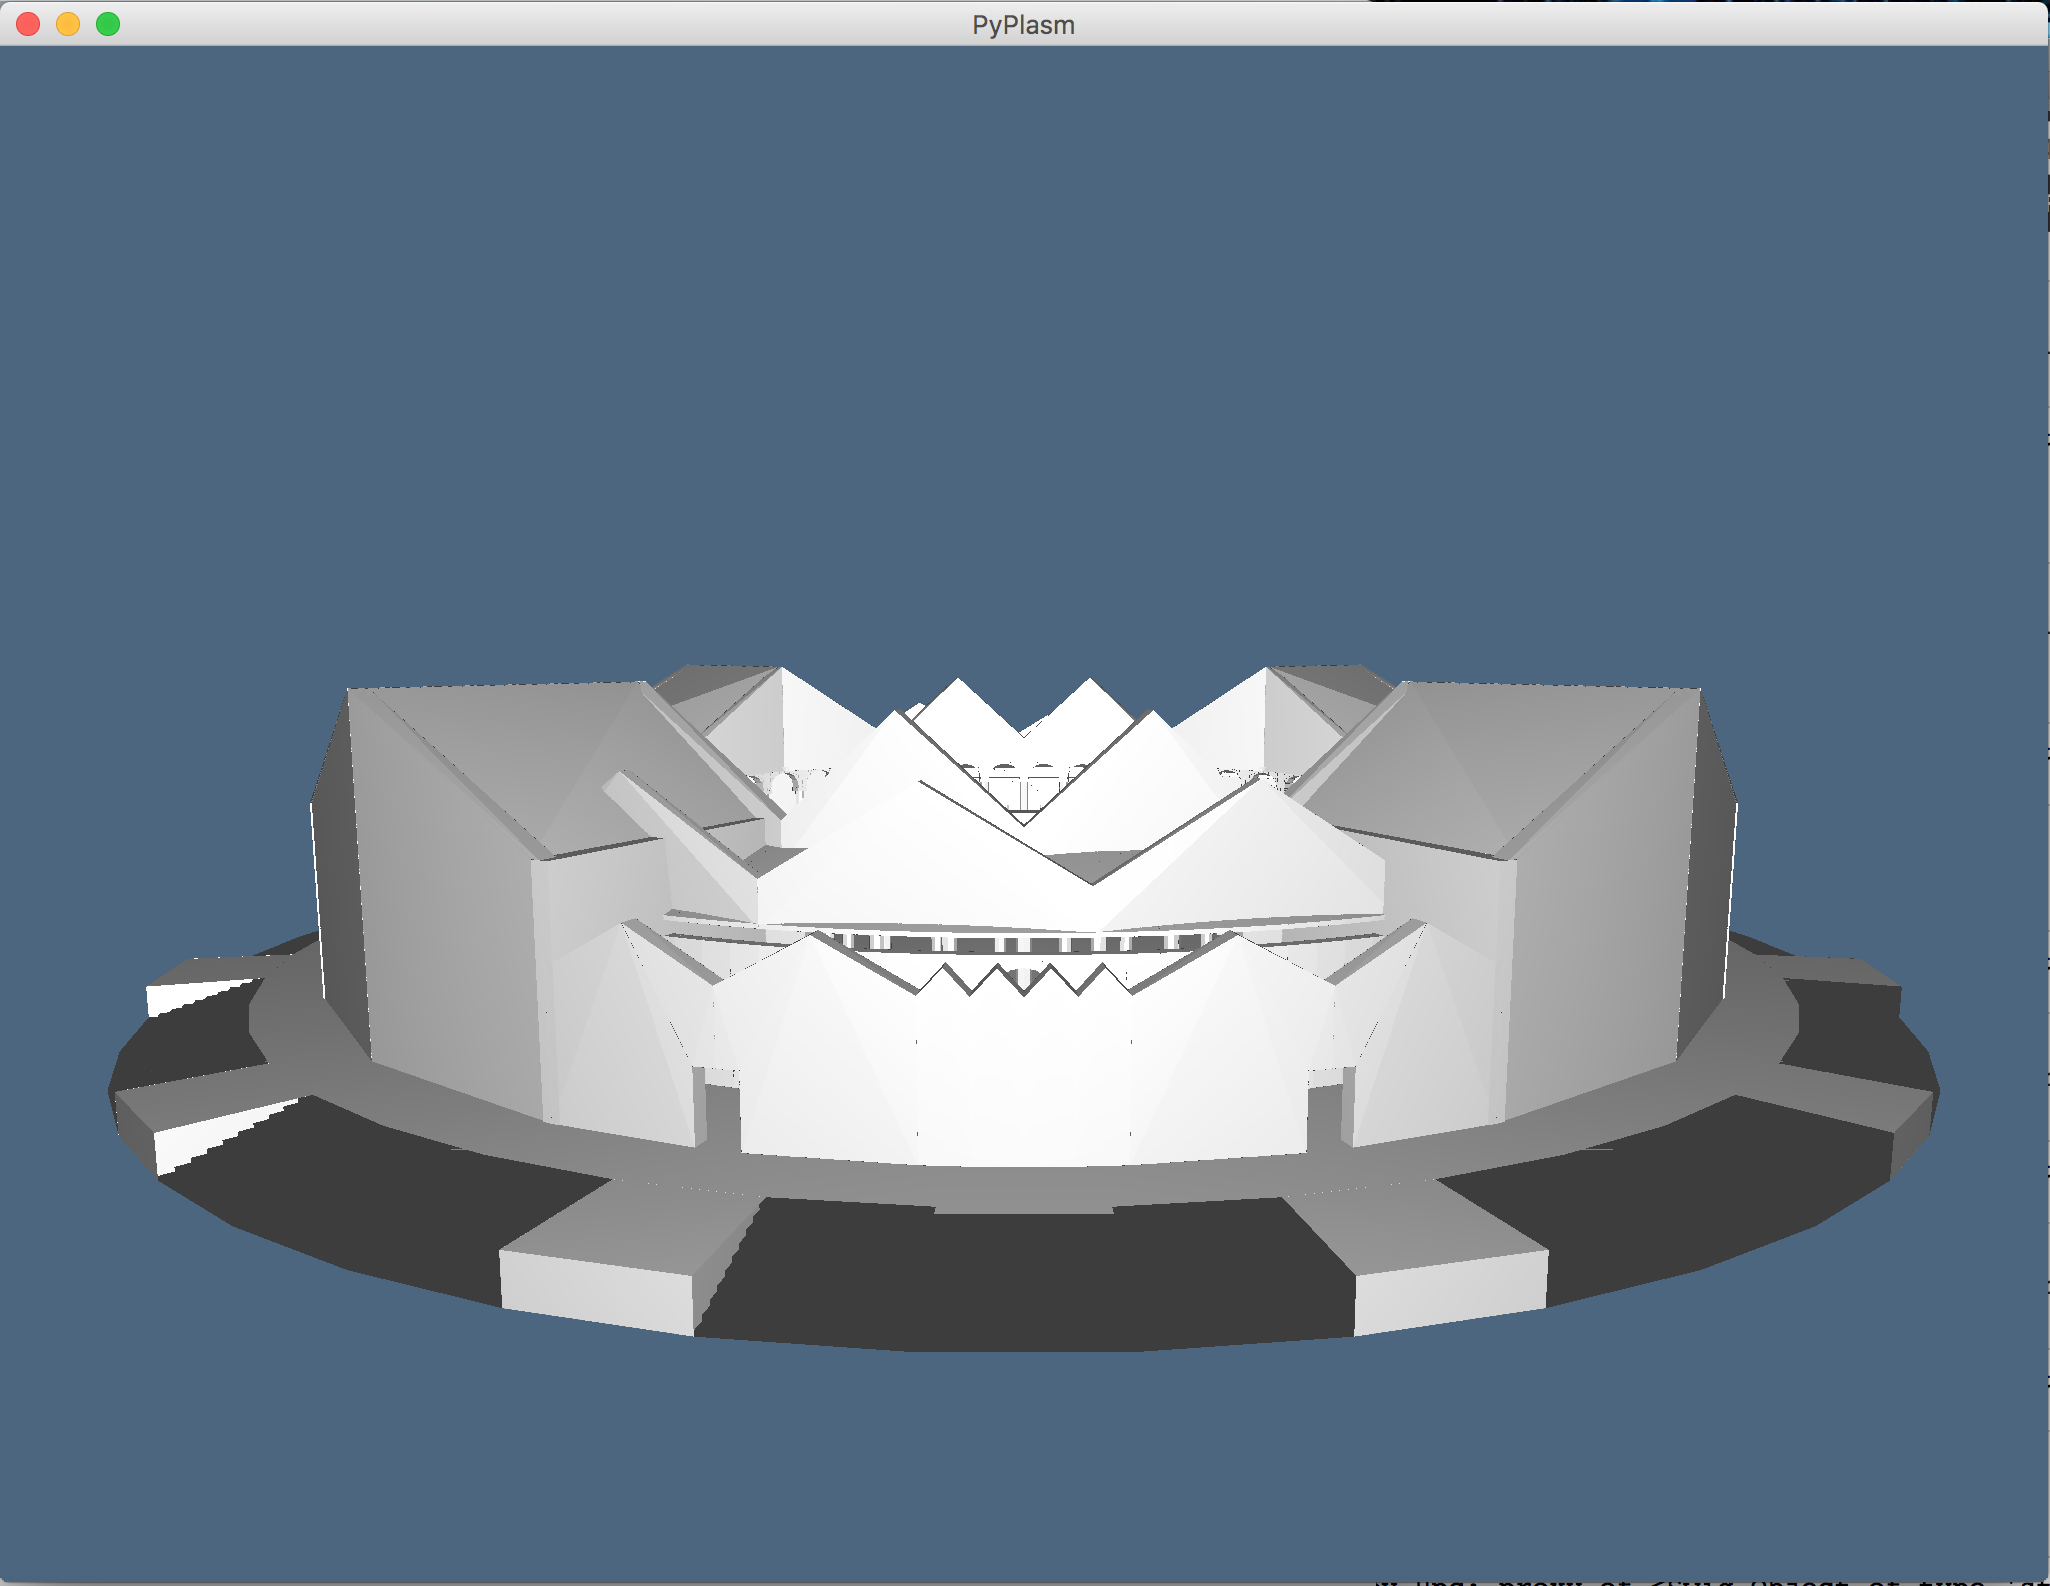

In [32]:
fase6 = STRUCT([fase5, The22Beam])
VIEW(fase7)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2a80> >

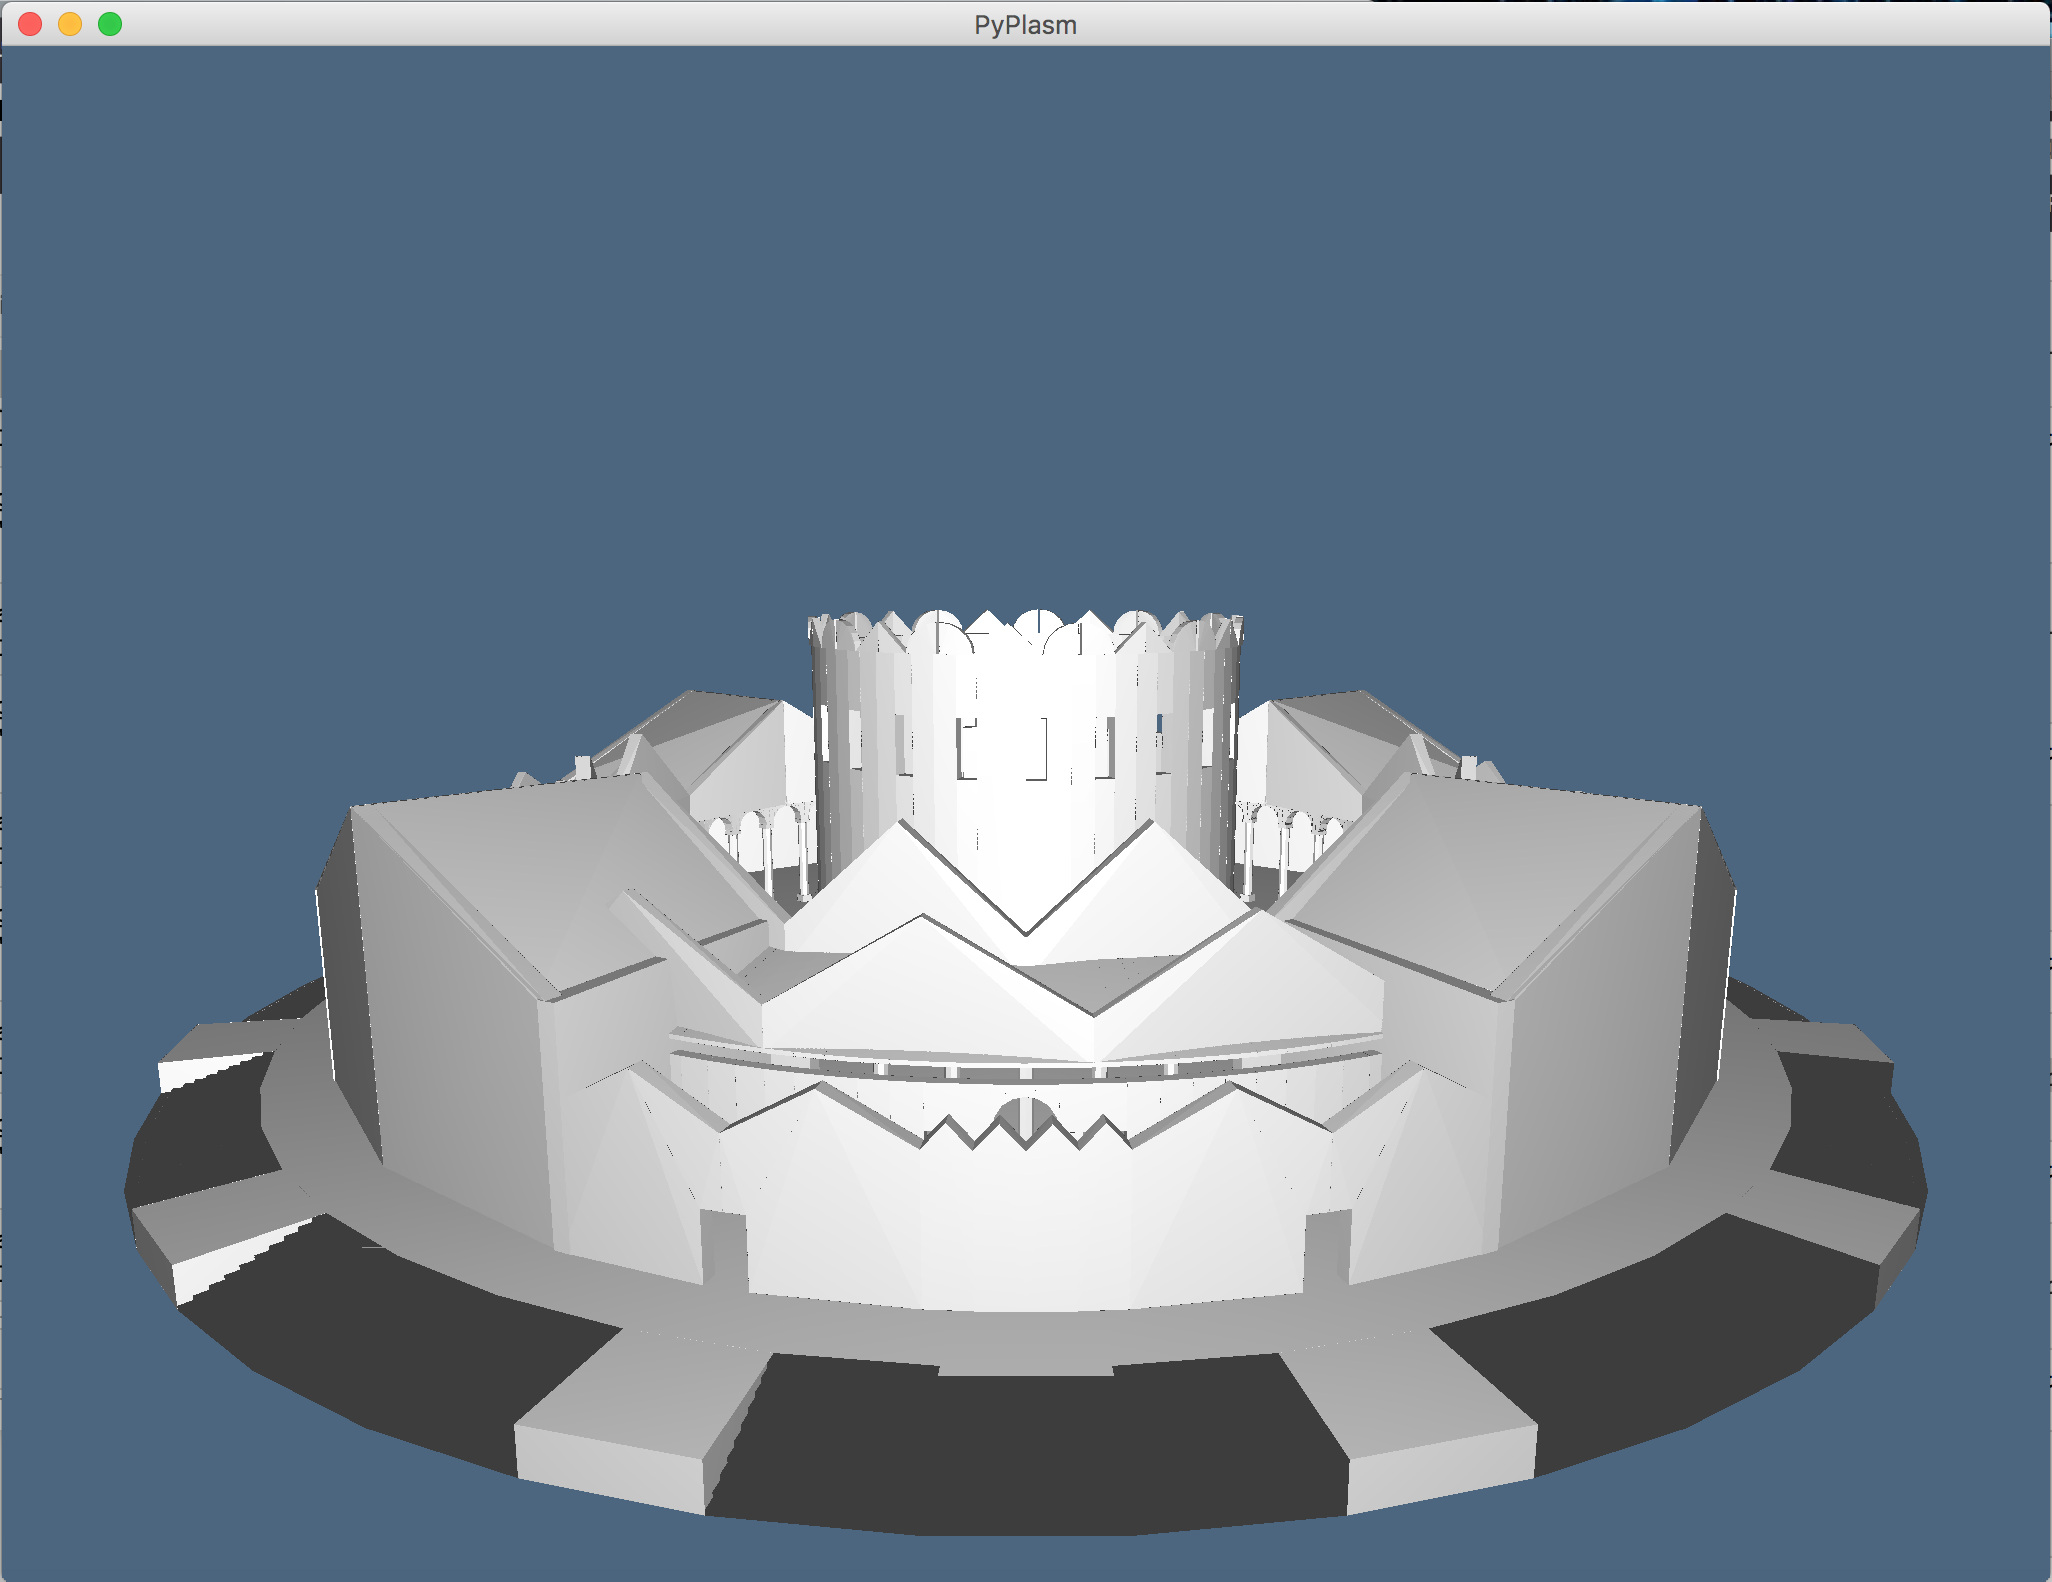

In [33]:
fase7 = STRUCT([fase5, The22Beam, The22Hwall, The11Frieze])
VIEW(fase7)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2ba0> >

In [34]:
fase8 = STRUCT([fase5, The22Beam, The22Hwall, The11Frieze, TopTrellis])
VIEW(fase8)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2bd0> >

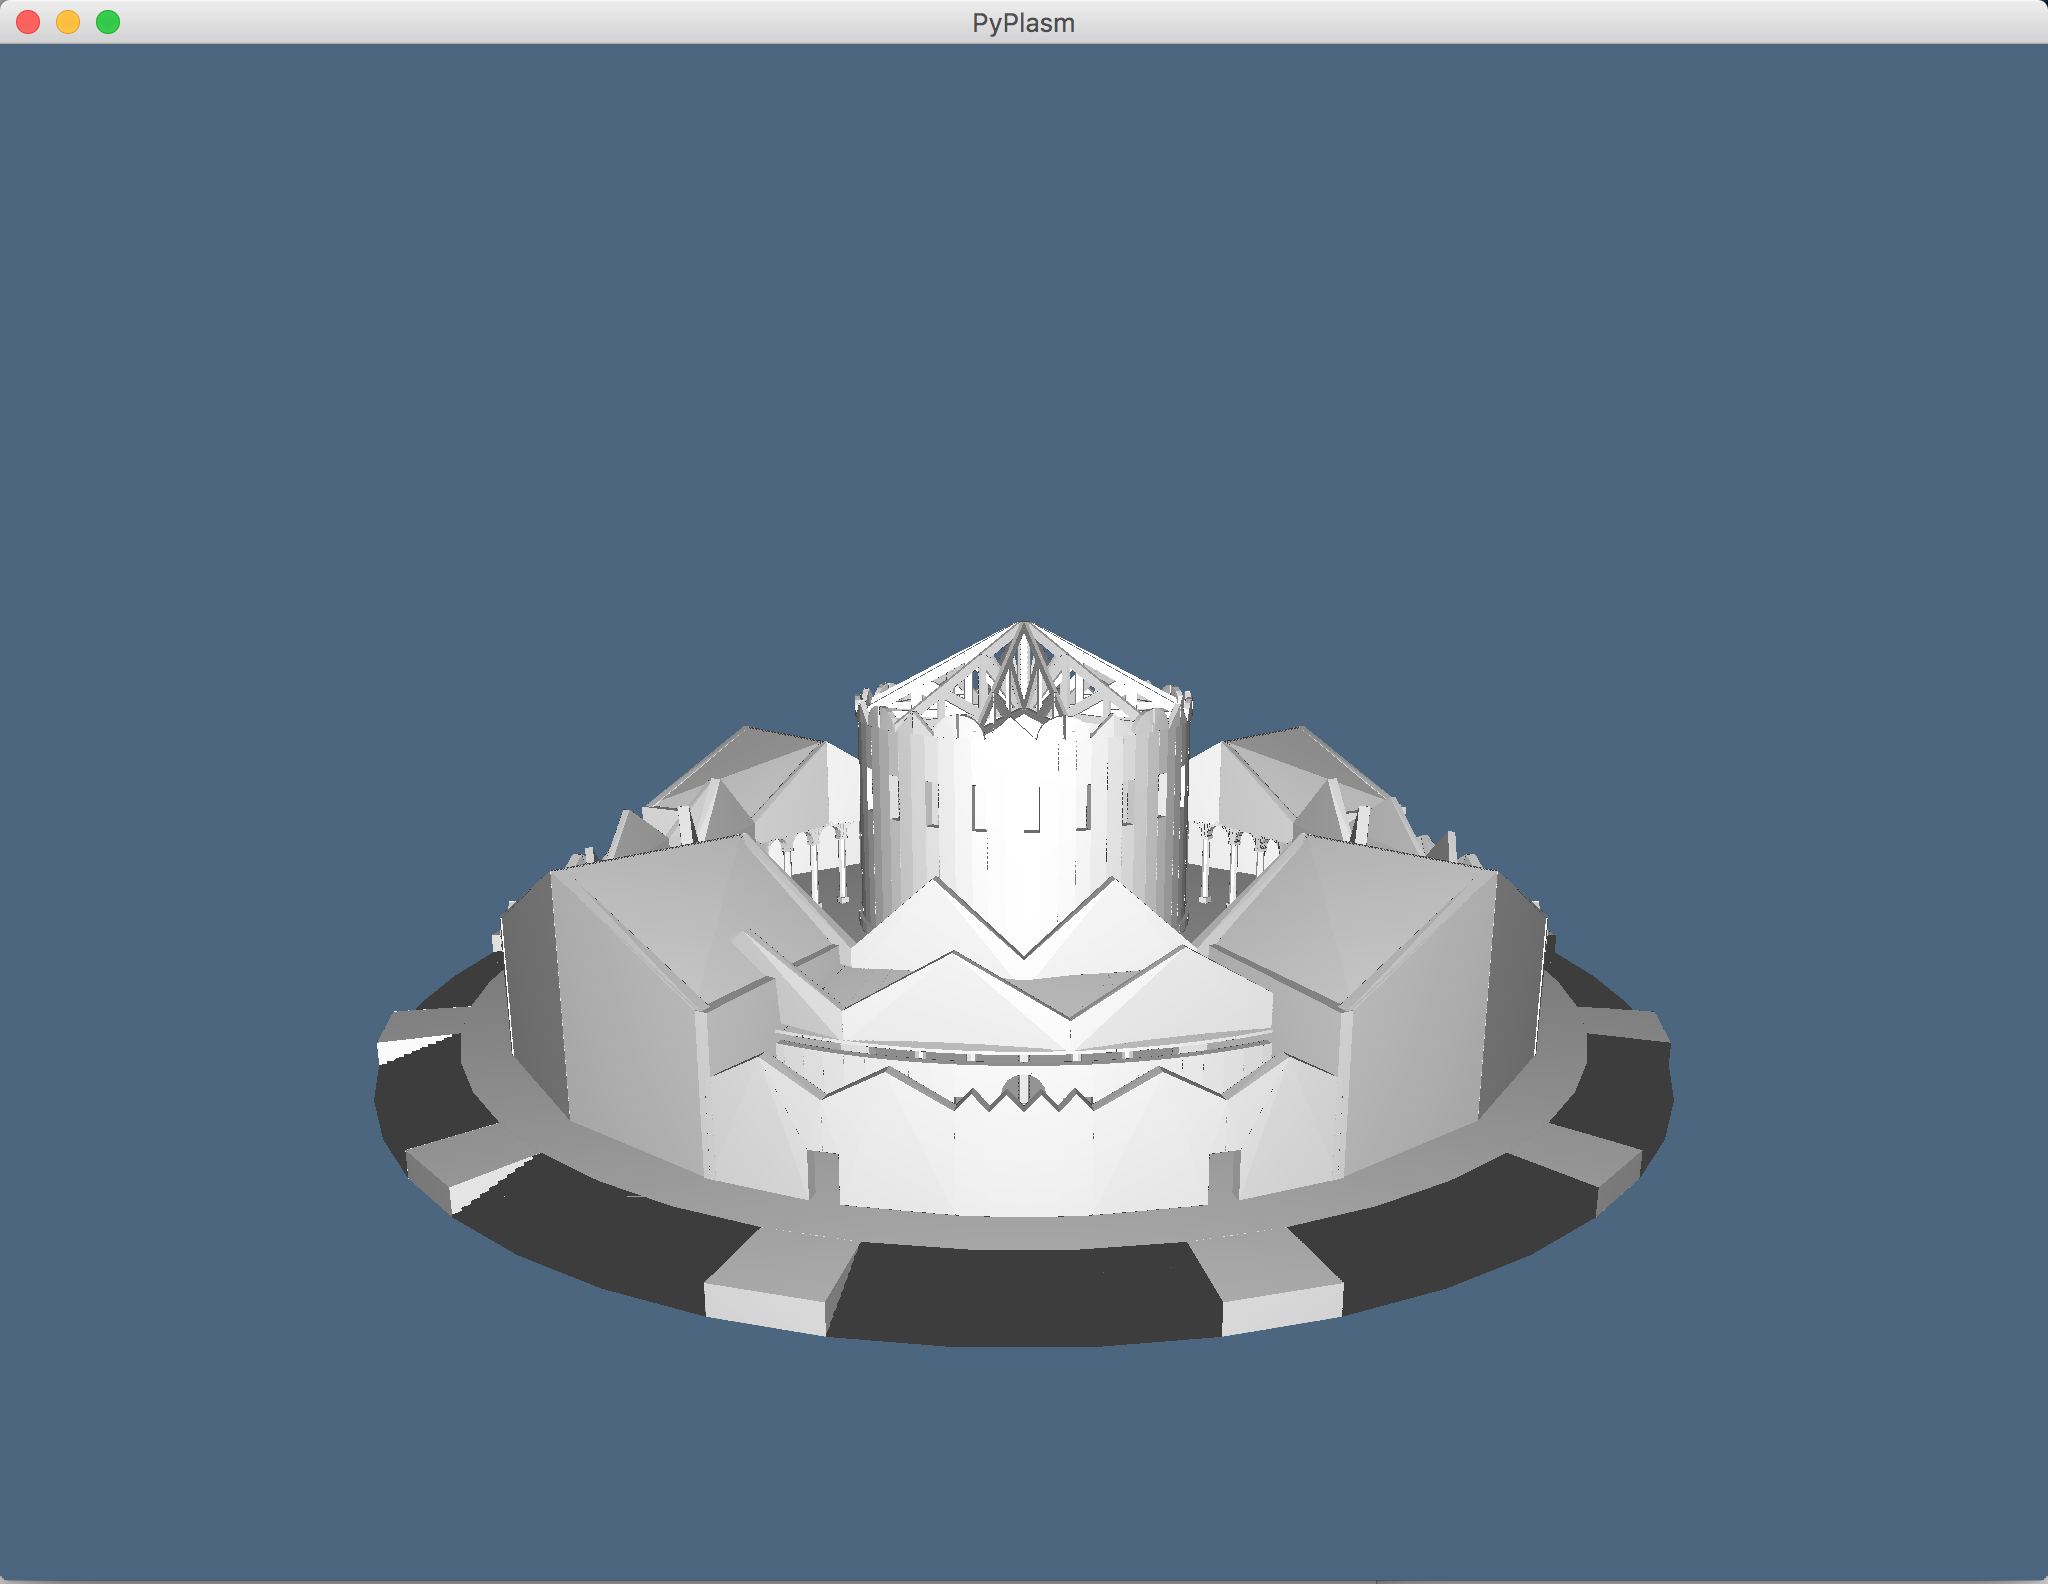

In [35]:
fase9 = STRUCT([fase8, DoubleMedTrellis])
VIEW(fase9)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x18150f2c30> >

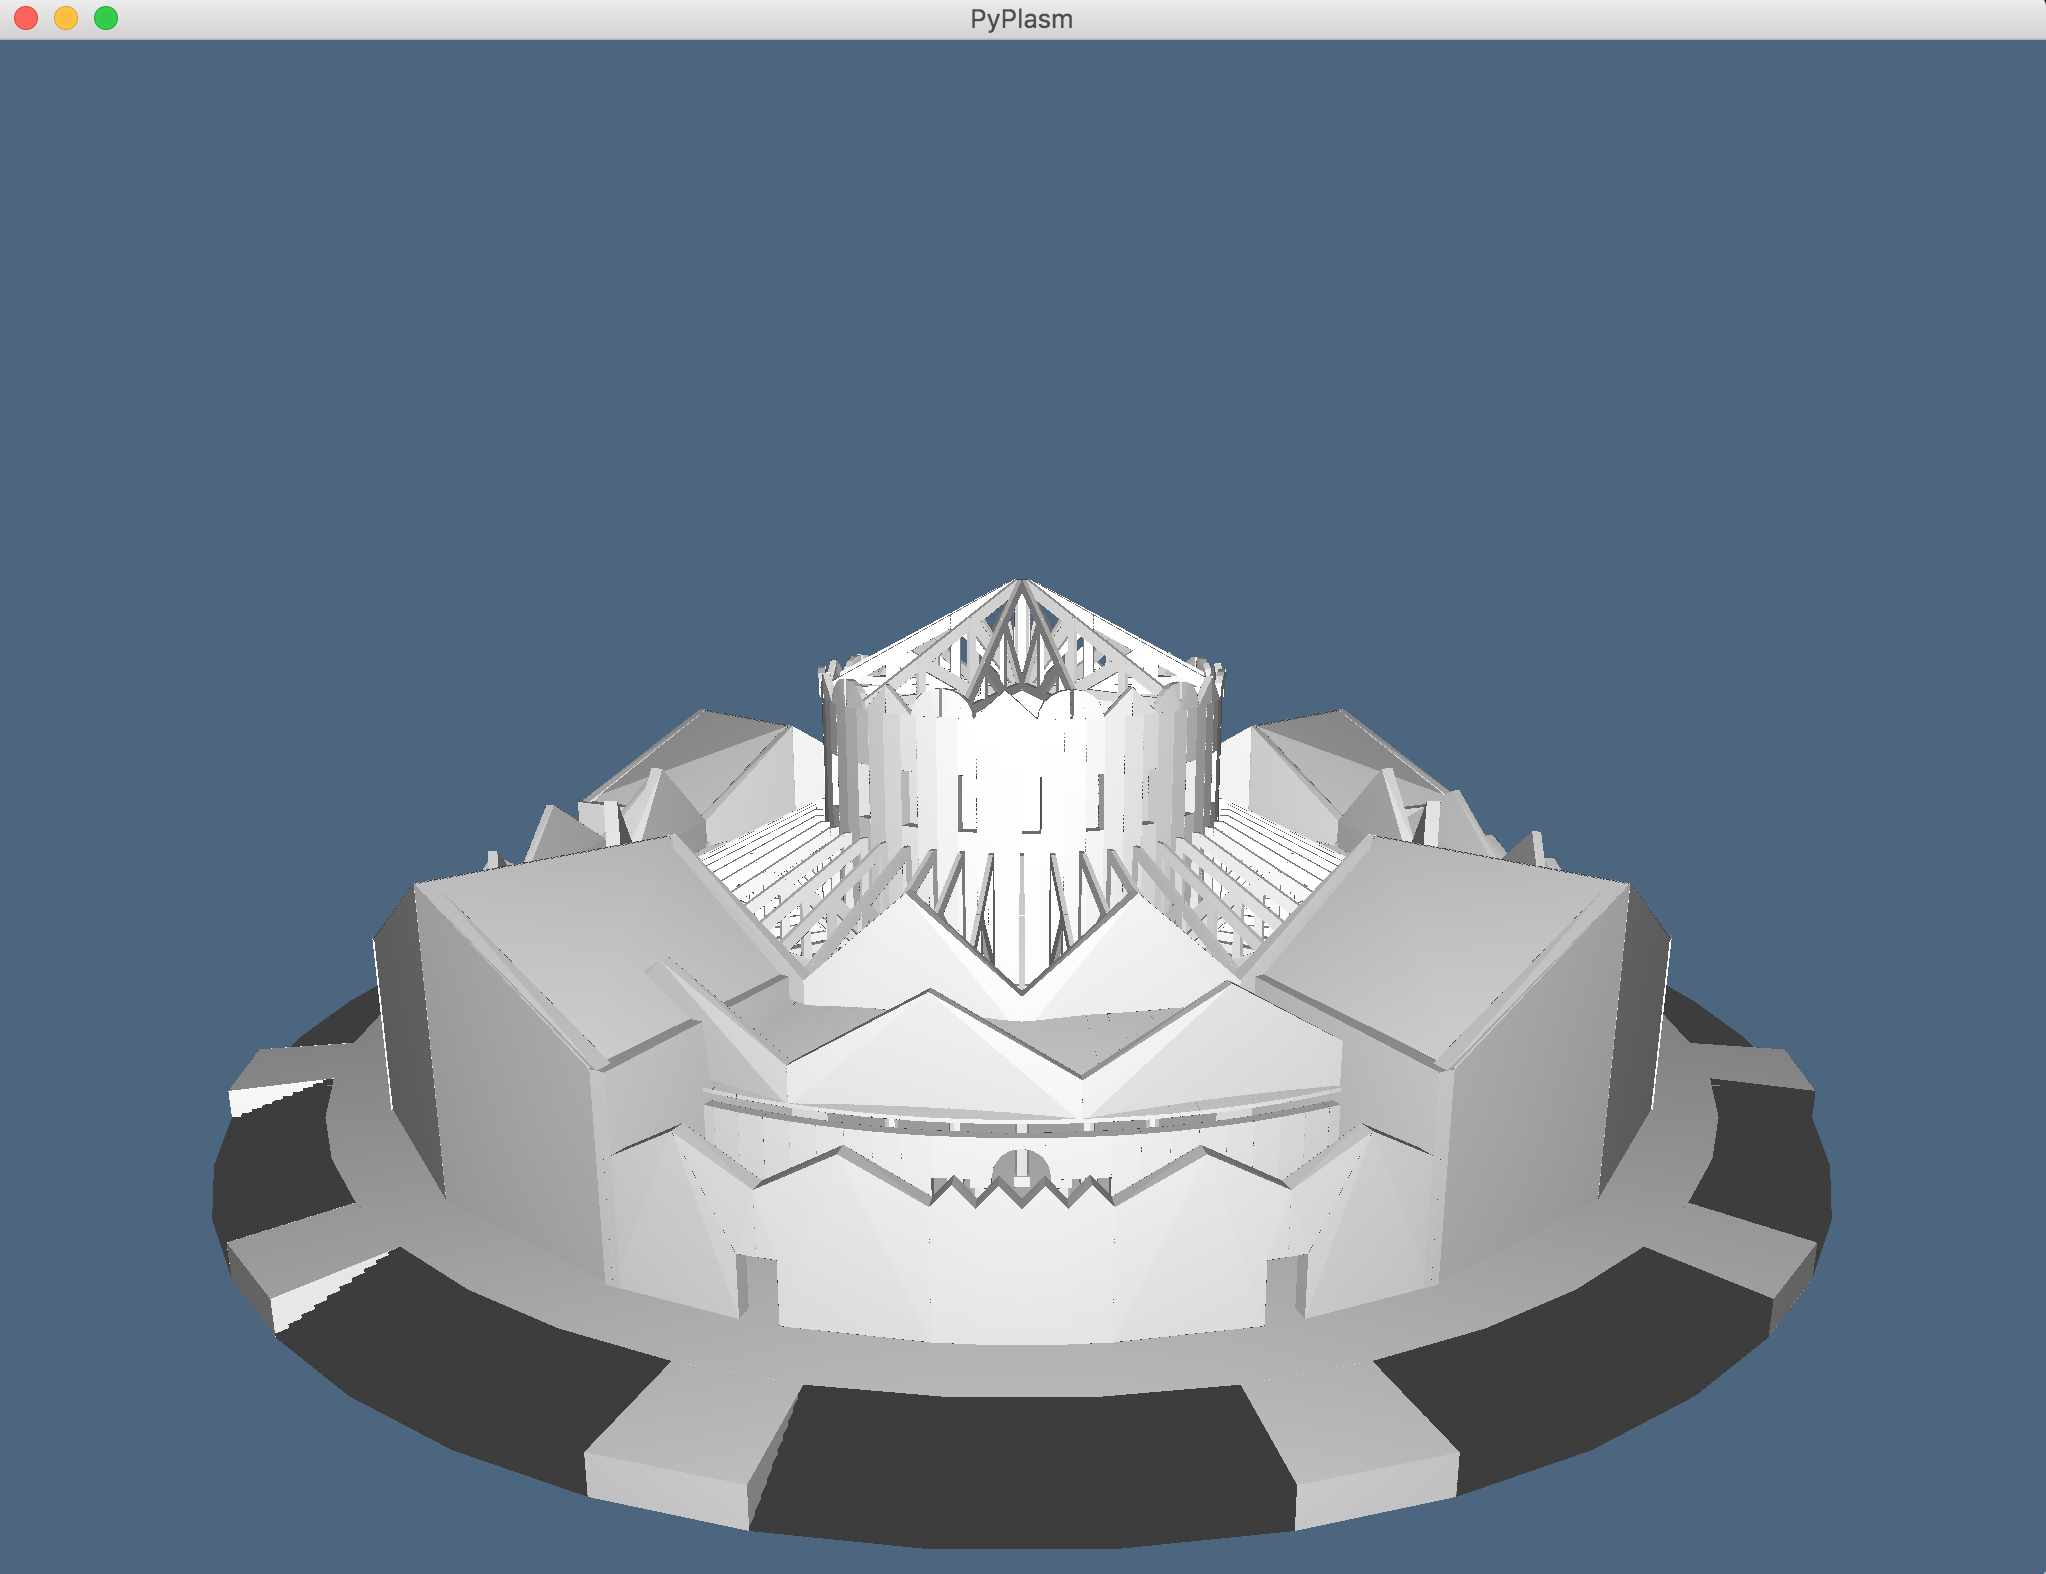